In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-j8yde4q3
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-j8yde4q3
  Resolved https://github.com/facebookresearch/detectron2.git to commit 5fcee61ce3a25050fc19e73714fdd7bafbefdbbc
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filena

In [ ]:
# clone and install Mask2Former
!git clone https://github.com/facebookresearch/Mask2Former.git
%cd Mask2Former
!pip install -U opencv-python
!pip install git+https://github.com/mcordts/cityscapesScripts.git
!pip install -r requirements.txt
%cd mask2former/modeling/pixel_decoder/ops
!python setup.py build install
%cd ../../../../

Cloning into 'Mask2Former'...
remote: Enumerating objects: 297, done.
remote: Counting objects: 100% (297/297), done.
remote: Compressing objects: 100% (174/174), done.
remote: Total 297 (delta 134), reused 188 (delta 122), pack-reused 0
Receiving objects: 100% (297/297), 409.65 KiB | 5.61 MiB/s, done.
Resolving deltas: 100% (134/134), done.
/content/Mask2Former
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 12.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/mcordts/cityscapesScripts.git to /tmp/pip-req-build-wthqm610
  Running command git clone --filter=blob:none --quiet https://github.com/mco

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 KB 23.7 MB/s eta 0:00:00
/content/Mask2Former/mask2former/modeling/pixel_decoder/ops
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.9
creating build/lib.linux-x86_64-3.9/functions
copying functions/ms_deform_attn_func.py -> build/lib.linux-x86_64-3.9/functions
copying functions/__init__.py -> build/lib.linux-x86_64-3.9/functions
creating build/lib.linux-x86_64-3.9/modules
copying modules/__init__.py -> build/lib.linux-x86_64-3.9/modules
copying modules/ms_deform_attn.py -> build/lib.linux-x86_64-3.9/modules
running build_ext
/usr/local/lib/python3.9/dist-packages/torch/utils/cpp_extension.py:476: UserWarning: Attempted to use ninja as the Buil

In [ ]:
!pip install faiss-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 11.6 MB/s eta 0:00:00


In [ ]:
import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

torch:  1.13 ; cuda:  cu116


In [ ]:
def countless(data):
  """
  Vectorized implementation of downsampling a 2D 
  image by 2 on each side using the COUNTLESS algorithm.
  
  data is a 2D numpy array with even dimensions.
  """
  # allows us to prevent losing 1/2 a bit of information 
  # at the top end by using a bigger type. Without this 255 is handled incorrectly.
  data, upgraded = upgrade_type(data) 

  data = data + 1 # don't use +=, it will affect the original data.

  sections = []
  
  # This loop splits the 2D array apart into four arrays that are
  # all the result of striding by 2 and offset by (0,0), (0,1), (1,0), 
  # and (1,1) representing the A, B, C, and D positions from Figure 1.
  factor = (2,2)
  for offset in np.ndindex(factor):
    part = data[tuple(np.s_[o::f] for o, f in zip(offset, factor))]
    sections.append(part)

  a, b, c, d = sections

  ab_ac = a * ((a == b) | (a == c)) # PICK(A,B) || PICK(A,C) w/ optimization
  bc = b * (b == c) # PICK(B,C)

  a = ab_ac | bc # (PICK(A,B) || PICK(A,C)) or PICK(B,C)
  result = a + (a == 0) * d - 1 # (matches or d) - 1

  if upgraded:
    return downgrade_type(result)

  return result

def upgrade_type(arr):
  dtype = arr.dtype

  if dtype == np.uint8:
    return arr.astype(np.uint16), True
  elif dtype == np.uint16:
    return arr.astype(np.uint32), True
  elif dtype == np.uint32:
    return arr.astype(np.uint64), True

  return arr, False
  
def downgrade_type(arr):
  dtype = arr.dtype

  if dtype == np.uint64:
    return arr.astype(np.uint32)
  elif dtype == np.uint32:
    return arr.astype(np.uint16)
  elif dtype == np.uint16:
    return arr.astype(np.uint8)
  
  return arr

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image
import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np
import seaborn as sb
from matplotlib import cm

import cv2
import faiss
from google.colab.patches import cv2_imshow
from skimage.measure import block_reduce

In [ ]:
%cd /content/Mask2Former
import detectron2
from detectron2.utils.logger import setup_logger

setup_logger()
setup_logger(name="mask2former")

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog
from detectron2.projects.deeplab import add_deeplab_config
cityscapes_metadata = MetadataCatalog.get("cityscapes_fine_sem_seg_train")
from scipy.stats import mode
from sklearn.neighbors import NearestNeighbors


# import Mask2Former project
from mask2former import add_maskformer2_config

/content/Mask2Former


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
def inverse_normalize(tensor, mean, std):
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor

input = inverse_normalize(tensor=input, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))

In [ ]:
class SemanticLabels(nn.Module):
    '''Extract the semantic labels as a pooling layers'''
    def __init__(self):
        super(SemanticLabels, self).__init__()
        self.cfg = get_cfg()
        add_deeplab_config(self.cfg)
        add_maskformer2_config(self.cfg)
        self.cfg.merge_from_file("configs/cityscapes/semantic-segmentation/swin/maskformer2_swin_large_IN21k_384_bs16_90k.yaml")
        self.cfg.MODEL.WEIGHTS = 'https://dl.fbaipublicfiles.com/maskformer/mask2former/cityscapes/semantic/maskformer2_swin_large_IN21k_384_bs16_90k/model_final_17c1ee.pkl'
        self.cfg.MODEL.MASK_FORMER.TEST.SEMANTIC_ON = True
        self.predictor = DefaultPredictor(self.cfg)

    def forward(self, input):
        inputInTensor = input.squeeze(0)
        # invTrans = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
        #                                              std = [ 1/0.229, 1/0.224, 1/0.225 ]),
        #                         transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
        #                                              std = [ 1., 1., 1. ]),
        #                        ])
        # inputToGenerateLabels = invTrans(inputInTensor)

        imgTest = cv2.imread("/content/002998_pitch1_yaw12.jpg")
        print(inputToGenerateLabels)
        print(np.alltrue(imgTest == inputToGenerateLabels))
        semanticOutputs = self.predictor(inputToGenerateLabels)
        labels = semanticOutputs['sem_seg'].argmax(0)
        print(np.unique(labels.cpu().numpy()))
        while labels.shape > (30,40):
            labels = countless(labels)
        labels.to(device)
        return labels

In [ ]:
# create an instance of your module
my_module = SemanticLabels()

# Load image and apply transforms
img_path = "/content/002998_pitch1_yaw12.jpg"
transform = transforms.Compose([
    transforms.ToTensor()
])
img = transform(Image.open(img_path)).unsqueeze(0)

# pass the input tensor through the module
output_tensor = my_module(img)

# print the output tensor
print(output_tensor)

[03/09 12:10:35 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/maskformer/mask2former/cityscapes/semantic/maskformer2_swin_large_IN21k_384_bs16_90k/model_final_17c1ee.pkl ...
WARNING [03/09 12:10:35 mask2former.modeling.transformer_decoder.mask2former_transformer_decoder]: Weight format of MultiScaleMaskedTransformerDecoder have changed! Please upgrade your models. Applying automatic conversion now ...
[[[0.5505569  0.5460667  0.5433726  ... 0.60443926 0.60443926 0.60443926]
  [0.54965883 0.5487608  0.54965883 ... 0.60443926 0.60443926 0.60443926]
  [0.54067844 0.5424745  0.5469647  ... 0.60443926 0.60443926 0.60443926]
  ...
  [0.5631294  0.5424745  0.52181965 ... 0.64395297 0.64395297 0.6502392 ]
  [0.51732945 0.51732945 0.5236157  ... 0.6493412  0.64485097 0.6475451 ]
  [0.54067844 0.5586392  0.58827454 ... 0.6520353  0.64395297 0.6430549 ]]

 [[0.5210039  0.51573336 0.51309806 ... 0.58864313 0.58864313 0.58864313]
  [0.52012

<ipython-input-62-29aa61c26728>:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(np.alltrue(imgTest == inputToGenerateLabels))


RuntimeError: ignored

In [ ]:
import torch

a = b = 100

def customSoftmax(x, shadow, informative):
  informativeScore = torch.sum(torch.exp(-1 * b * torch.norm(x - informative, dim=1) ** 2))
  shadowScore = torch.sum(torch.exp(-1 * b * torch.norm(x - shadow, dim=1) ** 2))
  # print(informativeScore, shadowScore)
  return informativeScore / (informativeScore + shadowScore)

def customAlpha(x, centroids):
  return torch.exp(-1 * a * torch.norm(x - centroids, dim=1) ** 2) / torch.exp(-1 * a * torch.norm(x - centroids, dim=1) ** 2).sum()

In [ ]:
km = faiss.Kmeans(512, 128, niter = 16)
  inputs = inputs.numpy()
  km.train(inputs)

  nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(km.centroids)
  distances, clusterAssignment = nbrs.kneighbors(inputs)

  noOfInformative = 1
  noOfShadow = 4
  
  while labels.shape > (30, 40):
    labels = countless(labels)

  labels = labels.flatten()
  clusterAssignment = clusterAssignment.flatten()
  
  clusters = defaultdict(list)
  for label, point, clusterId in zip(labels, inputs, clusterAssignment):
    clusters[clusterId].append((point, label))
 
  for clusterId, elements in clusters.items():
    # Collect the informative and shadow centroids in the cluster
    informativeInCluster = []
    shadowInCluster = []
    for point, label in elements:
      (informativeInCluster, shadowInCluster)[label in shadowLabels].append(point)

    # Adjustments as described above
    if not informativeInCluster:
      informativeInCluster.append([0] * 512)
    if not shadowInCluster:
      shadowInCluster.append([0] * 512)
    
    # Finding the centroids
    informativeCentroids = np.array(informativeInCluster)
    if len(informativeInCluster) > noOfInformative:
      nbrs = NearestNeighbors(n_neighbors=noOfInformative, algorithm='ball_tree').fit(informativeInCluster)
      distances, indices = nbrs.kneighbors(km.centroids[clusterId].reshape(1, -1))
      informativeCentroids = informativeCentroids[list(indices[0])]

    shadowCentroids = np.array(shadowInCluster)
    if len(shadowInCluster) > noOfShadow:
      nbrs = NearestNeighbors(n_neighbors=noOfShadow, algorithm='ball_tree').fit(shadowInCluster)
      distances, indices = nbrs.kneighbors(km.centroids[clusterId].reshape(1, -1))
      shadowCentroids = shadowCentroids[list(indices[0])]

    clusters[clusterId] = [shadowCentroids, informativeCentroids]

  weights = []
  for input in inputs:
    weight = 0
    for i, customAlphaVal in enumerate(customAlpha(input, km.centroids)):
      weight = weight + (customAlphaVal * customSoftmax(input, clusters[i][0], clusters[i][1]) * (input - km.centroids[i])) #  
    # print(weight.shape)
    weights.append(np.linalg.norm(weight)) # weight

In [ ]:
a = b = 100

def customSoftmax(x, shadow, informative):
  informativeScore = np.sum(np.exp(-1 * b * np.linalg.norm(x - informative) ** 2))
  shadowScore = np.sum(np.exp(-1 * b * np.linalg.norm(x - shadow) ** 2))
  # print(informativeScore, shadowScore)
  return informativeScore / (informativeScore + shadowScore)

def customAlpha(x, centroids):
  return np.exp(-1 * a * np.linalg.norm(x - centroids, axis = 1) ** 2) / np.exp(-1 * a * np.linalg.norm(x - centroids, axis = 1) ** 2).sum()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.neighbors import NearestNeighbors
import numpy as np
from collections import defaultdict
import seaborn as sb

# based on https://github.com/lyakaap/NetVLAD-pytorch/blob/master/netvlad.py
class NetVLAD(nn.Module):
    """NetVLAD layer implementation"""

    def __init__(self, num_clusters=64, dim=128, labels = -1,
                 normalize_input=True, vladv2=False):
        """
        Args:
            num_clusters : int
                The number of clusters
            dim : int
                Dimension of descriptors
            alpha : float
                Parameter of initialization. Larger value is harder assignment.
            normalize_input : bool
                If true, descriptor-wise L2 normalization is applied to input.
            vladv2 : bool
                If true, use vladv2 otherwise use vladv1
        """
        setup_logger()
        setup_logger(name="mask2former")

        super(NetVLAD, self).__init__()
        self.num_clusters = num_clusters
        self.dim = dim
        self.alpha = 0
        self.vladv2 = vladv2
        self.normalize_input = normalize_input
        self.conv = nn.Conv2d(dim, num_clusters, kernel_size=(1, 1), bias=vladv2)
        self.centroids = nn.Parameter(torch.rand(num_clusters, dim))
	# Hardcoded shadow labels
        self.shadowLabels = np.array([8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
        self.noOfInformative = 1
        self.noOfShadow = 4


    def init_params(self, clsts, traindescs):
        #TODO replace numpy ops with pytorch ops
        if self.vladv2 == False:
            clstsAssign = clsts / np.linalg.norm(clsts, axis=1, keepdims=True)
            dots = np.dot(clstsAssign, traindescs.T)
            dots.sort(0)
            dots = dots[::-1, :] # sort, descending

            self.alpha = (-np.log(0.01) / np.mean(dots[0,:] - dots[1,:])).item()
            self.centroids = nn.Parameter(torch.from_numpy(clsts))
            self.conv.weight = nn.Parameter(torch.from_numpy(self.alpha*clstsAssign).unsqueeze(2).unsqueeze(3))
            self.conv.bias = None
            
        else:
            knn = NearestNeighbors(n_jobs=-1) #TODO faiss?
            knn.fit(traindescs)
            del traindescs
            dsSq = np.square(knn.kneighbors(clsts, 2)[1])
            del knn
            self.alpha = (-np.log(0.01) / np.mean(dsSq[:,1] - dsSq[:,0])).item()
            self.centroids = nn.Parameter(torch.from_numpy(clsts))
            del clsts, dsSq

            self.conv.weight = nn.Parameter(
                (2.0 * self.alpha * self.centroids).unsqueeze(-1).unsqueeze(-1)
            )
            self.conv.bias = nn.Parameter(
                - self.alpha * self.centroids.norm(dim=1)
            )

    def forward(self, x, y = torch.empty(0)):
        N, C = x.shape[:2]

        if self.normalize_input:
            x = F.normalize(x, p=2, dim=1)  # across descriptor dim

        x_flatten = x.view(N, C, -1)

        # soft-assignment
        soft_assign = self.conv(x).view(N, self.num_clusters, -1)
        soft_assign = F.softmax(soft_assign, dim=1)
        if y.numel() != 0:
          labels_flatten = labels.view(N, -1).T.cpu().numpy()
          print(np.unique(labels_flatten))
          km = faiss.Kmeans(512, 128, niter = 16)
          x_numpy = np.ascontiguousarray(x_flatten.squeeze().cpu().detach().numpy().T)
          km.train(x_numpy)

          nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(km.centroids)
          distances, clusterAssignment = nbrs.kneighbors(x_numpy)
          clusters = defaultdict(list)
          for label, point, clusterId in zip(labels_flatten, x_numpy, clusterAssignment):
            clusters[clusterId[0]].append((point, label))
          

          for clusterId, elements in clusters.items():
            # Collect the informative and shadow centroids in the cluster
            informativeInCluster = []
            shadowInCluster = []
            for point, label in elements:
              if label in self.shadowLabels:
                shadowInCluster.append(point)
              else:
                informativeInCluster.append(point)

            # Adjustments as described above
            if not informativeInCluster:
              informativeInCluster.append(np.zeros(512))
            if not shadowInCluster:
              shadowInCluster.append(np.zeros(512))
              
            # Finding the centroids"
            informativeCentroids = np.array(informativeInCluster)
            if len(informativeInCluster) > self.noOfInformative:
              nbrs = NearestNeighbors(n_neighbors=self.noOfInformative, algorithm='ball_tree').fit(informativeInCluster)
              distances, indices = nbrs.kneighbors(km.centroids[clusterId].reshape(1, -1))
              informativeCentroids = informativeCentroids[list(indices[0])]

            shadowCentroids = np.array(shadowInCluster)
            if len(shadowInCluster) > self.noOfShadow:
              nbrs = NearestNeighbors(n_neighbors=self.noOfShadow, algorithm='ball_tree').fit(shadowInCluster)
              distances, indices = nbrs.kneighbors(km.centroids[clusterId].reshape(1, -1))
              shadowCentroids = shadowCentroids[list(indices[0])]
            

            clusters[clusterId] = [shadowCentroids, informativeCentroids]

          weights = []
          for input in x_numpy:
            weight = np.zeros(512)
            for i, customAlphaVal in enumerate(customAlpha(input, km.centroids)):
              weight = weight + (customAlphaVal * customSoftmax(input, clusters[i][0], clusters[i][1]) * (input - km.centroids[i]))  
            weights.append(np.linalg.norm(weight)) # weight

          weights = torch.tensor(weights)
          weights = weights.reshape((30,40))

          imgTest = cv2.imread("/content/002998_pitch1_yaw12.jpg")
          fig, ax = plt.subplots(figsize=(16,12))
          sb.heatmap(weights,ax=ax, alpha = 0.5, zorder = 2,  cmap="viridis", cbar = True)
          ax.imshow(imgTest, aspect = ax.get_aspect(),
                    extent = ax.get_xlim() + ax.get_ylim(),
                    zorder = 1)
          ax.axis('off')
                    
        # calculate residuals to each clusters
        vlad = torch.zeros([N, self.num_clusters, C], dtype=x.dtype, layout=x.layout, device=x.device)
        for C in range(self.num_clusters): # slower than non-looped, but lower memory usage 
            residual = x_flatten.unsqueeze(0).permute(1, 0, 2, 3) - \
                    self.centroids[C:C+1, :].expand(x_flatten.size(-1), -1, -1).permute(1, 2, 0).unsqueeze(0)
            residual *= soft_assign[:,C:C+1,:].unsqueeze(2)
            vlad[:,C:C+1,:] = residual.sum(dim=-1)

        vlad = F.normalize(vlad, p=2, dim=2)  # intra-normalization
        vlad = vlad.view(x.size(0), -1)  # flatten
        vlad = F.normalize(vlad, p=2, dim=1)  # L2 normalize

        return vlad


[03/09 11:42:01 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/maskformer/mask2former/cityscapes/semantic/maskformer2_swin_large_IN21k_384_bs16_90k/model_final_17c1ee.pkl ...
WARNING [03/09 11:42:01 mask2former.modeling.transformer_decoder.mask2former_transformer_decoder]: Weight format of MultiScaleMaskedTransformerDecoder have changed! Please upgrade your models. Applying automatic conversion now ...
[0 2 3]


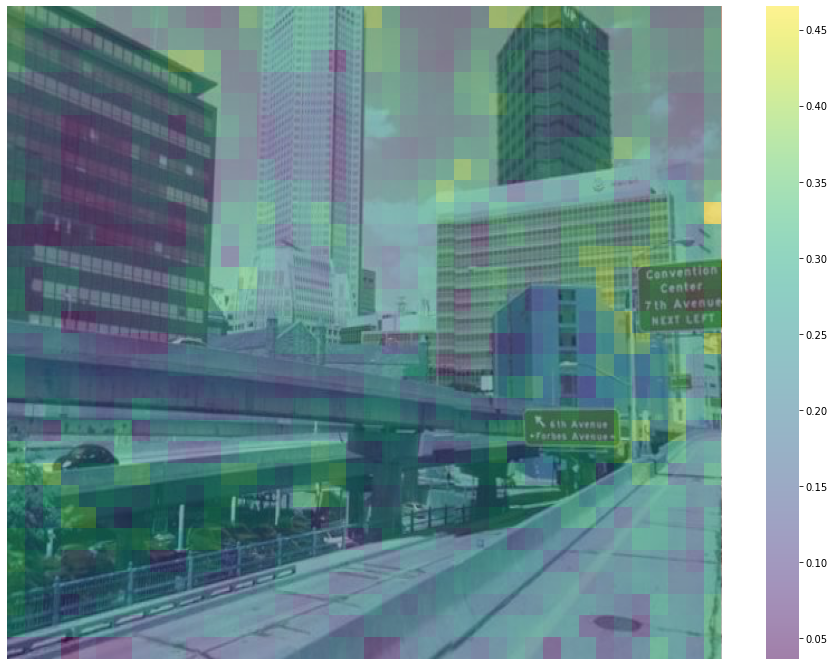

In [ ]:
encoder = nn.Sequential(*layers)
model = nn.Module() 
model.add_module('encoder', encoder)
net_vlad = NetVLAD(num_clusters=64, dim=encoder_dim)
genLabels = SemanticLabels()
model.add_module('pool', net_vlad)
model.add_module('generateLabels', genLabels)
model.to(device)

input = img.to(device)
labels = model.generateLabels(input)
image_encoding = model.encoder(input)
vlad_encoding = model.pool(image_encoding, labels)

In [ ]:
from __future__ import print_function
import argparse
from math import log10, ceil
import random, shutil, json
from os.path import join, exists, isfile, realpath, dirname
from os import makedirs, remove, chdir, environ

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader, SubsetRandomSampler
from torch.utils.data.dataset import Subset
import torchvision.transforms as transforms
from PIL import Image
from datetime import datetime
import torchvision.datasets as datasets
import torchvision.models as models
import h5py
import faiss
import numpy as np


In [ ]:
encoder_dim = 512
encoder = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
# capture only feature part and remove last relu and maxpool
layers = list(encoder.features.children())[:-2]

# if using pretrained then only train conv5_1, conv5_2, and conv5_3
for l in layers[:-5]: 
  for p in l.parameters():
    p.requires_grad = False

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

class L2Norm(nn.Module):
    def __init__(self, dim=1):
        super().__init__()
        self.dim = dim

    def forward(self, input):
        return F.normalize(input, p=2, dim=self.dim)